In [1]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import filtfilt
from src.iaf.simulation import Simulation

fpath = Path("configs/basic_ica.yaml")

sim = Simulation.from_yaml(fpath)

In [3]:
sim.source_populations

{'excitatory': <src.iaf.source_population.SourcePopulationICA at 0x123bbd950>,
 'inhibitory': <src.iaf.source_population.SourcePopulationPoisson at 0x12456d0d0>}

In [6]:
for k, v in vars(sim.source_populations["excitatory"]).items():
    print(k, v if not isinstance(v, np.ndarray) else v.shape)

num_inputs 100
num_signals 3
source_method gauss
source_strength 3.0
rate_std 10.0
rate_mean 20.0
gauss_source_width 0.4
tau_stim 0.01
dt 0.001
rng Generator(PCG64)
source_loading (3, 100)
var_adjustment (100,)
_rates_samples_mean 10


In [2]:
sim.neuron

IaF(
    time_constant=0.02
    resistance=100000000.0
    reset_voltage=-0.07
    spike_threshold=-0.05
    dt=0.001
    use_homeostasis=True
    homeostasis_tau=20.0
    homeostasis_set_point=20.0
    synapse_groups={'basal': <src.iaf.synapse_group.SourcedSynapseGroup object at 0x12460aad0>, 'apical': <src.iaf.synapse_group.SourcedSynapseGroup object at 0x12453f390>, 'inhibitory': <src.iaf.synapse_group.DirectSynapseGroup object at 0x1246c4950>}
)

In [10]:
sgroups = sim.neuron.synapse_groups

In [2]:
out = sim.run(duration=1)

  0%|          | 0/1 [00:00<?, ?it/s]

{'basal': 0.5330677550038996, 'apical': 0.5261619459856136, 'inhibitory': 1.0}
1.599203269009807e-10 1.5992032650116989e-10 1.5992032650116989e-10
5.2616194730105134e-11 5.261619459856136e-11 5.261619459856136e-11
1e-10 1e-10 1e-10
{'basal': 0.5331204517922772, 'apical': 0.5261619473010514, 'inhibitory': 1.0}
1.5993613633738382e-10 1.5993613553768316e-10 1.5993613553768316e-10
5.261619499319268e-11 5.2616194730105134e-11 5.2616194730105134e-11
1e-10 1e-10 1e-10
{'basal': 0.5331204544579461, 'apical': 0.5261619499319268, 'inhibitory': 1.0}
1.5993613753693483e-10 1.5993613633738382e-10 1.5993613633738382e-10
5.2616195387824014e-11 5.261619499319268e-11 5.261619499319268e-11
1e-10 1e-10 1e-10
{'basal': 0.5331204584564494, 'apical': 0.5261619538782402, 'inhibitory': 1.0}
1.599361391363362e-10 1.5993613753693483e-10 1.5993613753693483e-10
5.2616195913999127e-11 5.2616195387824014e-11 5.2616195387824014e-11
1e-10 1e-10 1e-10
{'basal': 0.5331204637877873, 'apical': 0.5261619591399912, 'inhibi

100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

{'basal': 0.9027321280317422, 'apical': 0.9204998504539444, 'inhibitory': 1.0}
-0.00038453003311691693 -0.00038453157501941774 2.7081963840952266e-10
-0.0010487189186834827 -0.0010487231238747135 9.204998504539445e-11
1e-10 1e-10 1e-10
-0.0006579548782193263 -0.0006579575906889358 2.896317189814473e-10
-0.002990705209428114 -0.002990717538840447 9.898071158124024e-11
1e-10 1e-10 1e-10
{'basal': 0.9555351245540964, 'apical': 0.9403032414012299, 'inhibitory': 1.0}
-0.0016668194760607708 -0.0016668263434851216 2.866605373662289e-10
-0.0017047019360247398 -0.0017047089595277369 9.403032414012299e-11
1e-10 1e-10 1e-10
{'basal': 0.9316162110459398, 'apical': 0.910599616633682, 'inhibitory': 1.0}
-0.0007917391097877539 -0.0007917423698343246 2.7948486331378194e-10
-0.0005398222198073224 -0.0005398244425667576 9.105996166336821e-11
1e-10 1e-10 1e-10
-0.001797636472041953 -0.001797644076169406 2.9087038475807713e-10
-0.000612830615648506 -0.0006128332079646838 9.898069945951886e-11
1e-10 1e-10 

In [5]:
sim.neuron.synapse_groups["basal"].potentiation_eligibility[:10]

array([1.33946718e-05, 5.13220940e-07, 2.04116332e-03, 3.54794684e-12,
       7.71169895e-07, 2.55823352e-09, 2.65567384e-02, 3.60722013e-07,
       8.32230796e-05, 4.35540502e-05])

In [6]:
sim.neuron.synapse_groups["basal"].depression_eligibility

-0.062083731875968176

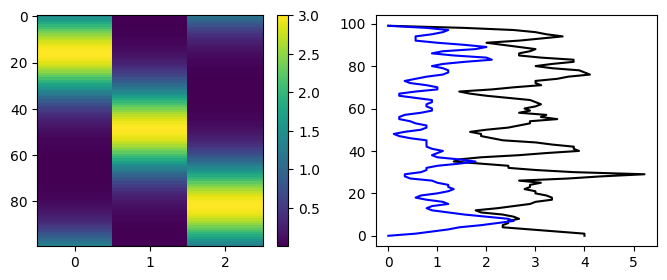

In [3]:
plt.figure(1, figsize=(8, 3))

plt.subplot(1, 2, 1)
im = plt.imshow(sim.source_populations["excitatory"].source_loading.T, aspect='auto', interpolation="none")
plt.colorbar(im)

plt.subplot(1, 2, 2)
smooth_factor = round(sim.source_populations["excitatory"].num_inputs/sim.source_populations["excitatory"].num_signals/10)
max_weight = sim.neuron.synapse_groups["basal"].max_weight
kernel = np.ones(smooth_factor) / smooth_factor
saw = filtfilt(kernel, 1, out["weights"]["basal"][-1])
plt.plot(saw/max_weight, range(sim.source_populations["excitatory"].num_inputs-1, -1, -1), 'k', linewidth=1.5, label="High DP")

smooth_factor = round(sim.source_populations["excitatory"].num_inputs/sim.source_populations["excitatory"].num_signals/10)
max_weight = sim.neuron.synapse_groups["apical"].max_weight
kernel = np.ones(smooth_factor) / smooth_factor
saw = filtfilt(kernel, 1, out["weights"]["apical"][-1])
plt.plot(saw/max_weight, range(sim.source_populations["excitatory"].num_inputs-1, -1, -1), 'b', linewidth=1.5, label="Low DP")

plt.show()

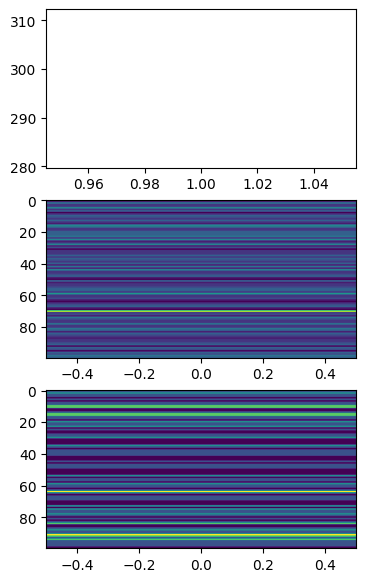

In [5]:
# Create spike train and PSTH
duration = out["weights"]["basal"].shape[0]
NT = int(duration / sim.dt)
dt = sim.dt
psth_window = 1  # in seconds
dpsth = round(psth_window/dt)
spikes = np.zeros(NT)
spikes[out["spike_times"]] = 1
psth = np.sum(spikes.reshape(-1, dpsth), axis=1)/psth_window
tvec = np.arange(NT) * dt + dt

# Create plots
plt.figure(1, figsize=(4, 7))
plt.subplot(3, 1, 1)
plt.plot(range(1, len(psth) + 1), psth)
plt.subplot(3, 1, 2)
plt.imshow(out["weights"]["basal"].T, aspect='auto')
plt.subplot(3, 1, 3)
plt.imshow(out["weights"]["apical"].T, aspect='auto')
plt.show()